## Introduction
Welcome, learners! Today, we step into an exciting chapter on non-linear dimensionality reduction techniques, where our focus will be on Kernel Principal Component Analysis (Kernel PCA), a variation from Principal Component Analysis (PCA). It's worth noting that Kernel PCA builds on PCA by extending its utility into non-linear dimensions.

The aim of today's lesson is to guide you to understand, uncover, and master Kernel PCA using sklearn. We'll cover everything from its theoretical foundation and the nuances of kernel selection to its practical applications.



## Theoretical Insight: Kernel PCA
Kernel PCA, a variant of PCA, deals efficiently with non-linear transformations using kernel methods. It manages these transformations with the "Kernel Trick", a technique that maps input data into a higher-dimensional feature space compatible with linear separability, facilitated by Kernel functions.

Kernels are critical when estimating the similarity between two observations. The process of kernel selection, which involves choosing suitable kernels, like Linear, Polynomial, and Radial Basis Function (RBF), plays a pivotal role in Kernel PCA and has a significant impact on model performance.



## Creating a Non-Linearly Separable Dataset
Before we begin, let's import the necessary libraries: sklearn's PCA, KernelPCA, train_test_split modules, matplotlib for graph plotting, and sklearn's make_circles to create a non-linearly separable dataset.

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

We dive into the crux of our lesson by creating a non-linearly separable dataset using make_circles(). We will split the dataset into training and testing sets, maintaining their stratification using sklearn's train_test_split().

In [3]:
X, y = make_circles(n_samples=1000, factor=0.01, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

The make_circles() generates a large circle containing a smaller circle in 2D to form our non-linearly separable dataset. Then train_test_split() segregates the dataset into a training set and a test set. Our plot showcases the training data with two classes:



## Implementing Kernel PCA
Next, we instantiate an object of the KernelPCA class and fit it to our training data.

In [4]:
kernel_pca = KernelPCA(kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
kernel_pca.fit(X_train)

KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=10, kernel='rbf')

When we execute fit() function on our training data, sklearn's KernelPCA estimates the first two eigenvalues to project onto.

Note: We set fit_inverse_transform=True to enable the inverse transformation of the projected data back to the original space.

## Kernel PCA Results
We transform our test data onto the principal components and visualize its projection as well as the original data.

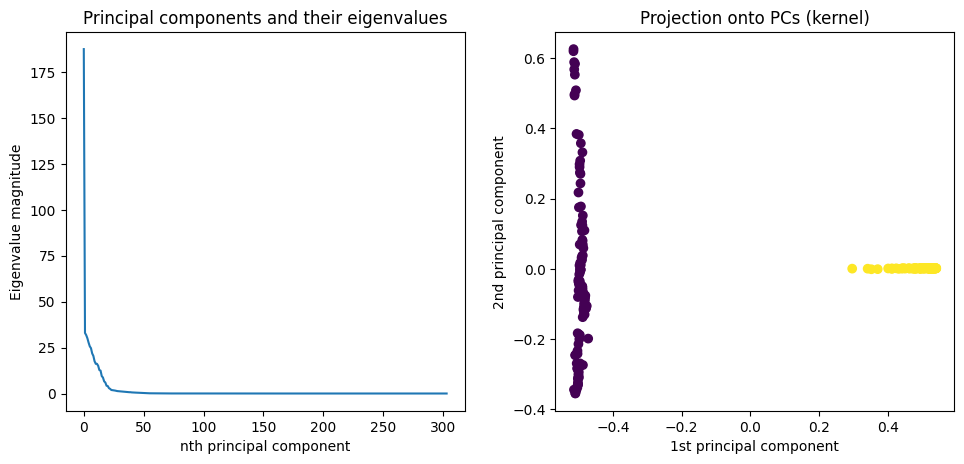

In [5]:
score_kernel_pca = kernel_pca.transform(X_test)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(kernel_pca.eigenvalues_)
axs[0].set_title("Principal components and their eigenvalues")
axs[0].set_xlabel("nth principal component")
axs[0].set_ylabel("Eigenvalue magnitude")

axs[1].scatter(score_kernel_pca[:,0], score_kernel_pca[:,1] ,c=y_test,cmap='viridis')
axs[1].set_title("Projection onto PCs (kernel)")
axs[1].set_xlabel("1st principal component")
axs[1].set_ylabel("2nd principal component")

plt.tight_layout(pad=2.0)
plt.show()

## Inverse Transformation
We can also inversely transform the projected data back to the original space using the inverse_transform() method and visualize it to understand the reconstruction.

Let's visualize the original data and the inversely transformed data to see how well the Kernel PCA model reconstructs the original data:

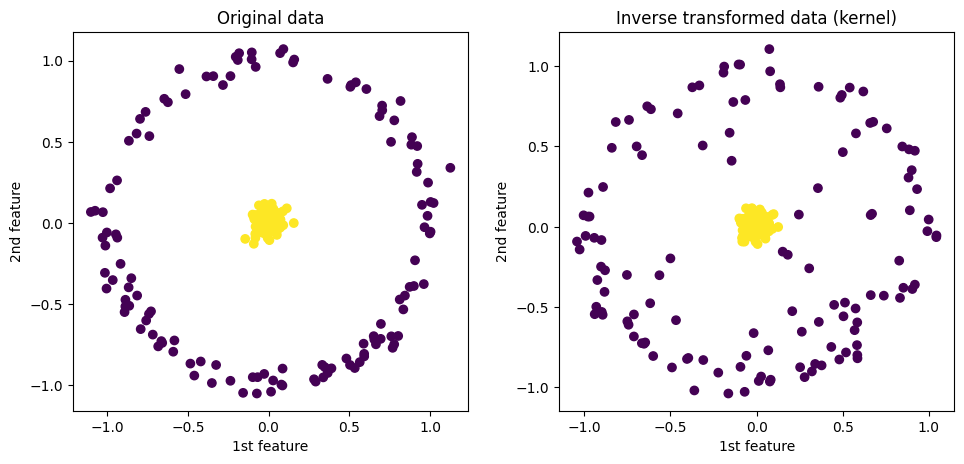

In [6]:
X_hat_kpca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

# Plot the original data and inverse transformed data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='viridis')
axs[0].set_title("Original data")
axs[0].set_xlabel("1st feature")
axs[0].set_ylabel("2nd feature")

axs[1].scatter(X_hat_kpca[:,0], X_hat_kpca[:,1], c=y_test, cmap='viridis')
axs[1].set_title("Inverse transformed data (kernel)")
axs[1].set_xlabel("1st feature")
axs[1].set_ylabel("2nd feature")

plt.tight_layout(pad=2.0)
plt.show()

## Computing the Reconstruction Error
Lastly, we compute the reconstruction error, the mean squared difference between our test dataset and the inversely transformed dataset.

In [7]:
print("Mean squared error for Kernel PCA is:",((X_test-X_hat_kpca)**2).mean()) # ~0.01

Mean squared error for Kernel PCA is: 0.011275231727477514


## Kernel PCA Hyperparameters
Kernel PCA offers a range of hyperparameters to fine-tune the model. Here are a few key parameters:

- kernel: The kernel function to use, such as 'linear', 'poly', 'rbf', 'sigmoid', or 'cosine' with default 'linear' suitable for linear transformations. The 'rbf' kernel is commonly used for non-linear data transformations, 'poly' for polynomial transformations, and 'sigmoid' for sigmoid transformations.
- gamma: The kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. A higher gamma value leads to a more complex model.
- degree: The degree of the polynomial kernel function which defines the non-linearity of the transformation for 'poly' kernel. The higher the degree, the more complex the transformation.
- alpha: The regularization parameter to control the balance between the data reconstruction and the non-linear transformation. A higher alpha value emphasizes the non-linear transformation.|

## Lesson Summary and Practice
Kudos on completing the lesson on Kernel PCA! Today, we have covered non-trivial aspects, such as how to work with non-linearly separable data, kernel techniques, and PCA. Now, it's time for some hands-on practice! Keep up the good work and happy coding!



## Kernel PCA: Visualizing Transformed Data and Calculating Reconstruction Error

Imagine you're working on classifying images with complex patterns. The data isn't straightforward, and linear methods simply don't cut it. That's where Kernel PCA becomes handy, as it can uncover the underlying structures in the data, aiding tasks like image classification or anomaly detection. Run the code to see how Kernel PCA transforms a non-linear dataset into a new space, making it easier to work with, and to calculate how close our reconstruction is to the original data.

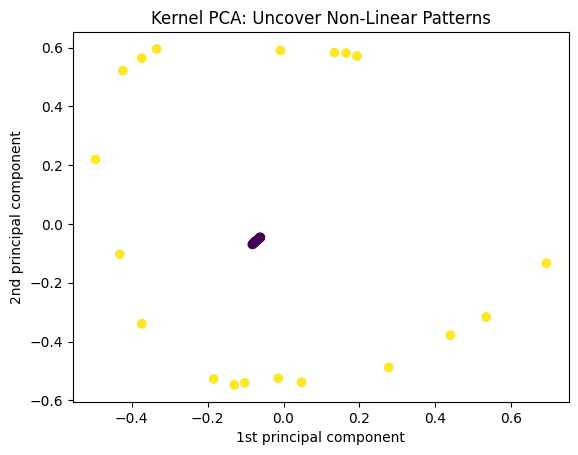

Mean squared reconstruction error: 0.25


In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Create a non-linearly separable dataset using make_circles
X, y = make_circles(n_samples=150, factor=0.3, noise=0.04, random_state=42)

# Split the dataset, stratify ensures the split datasets have the same class distribution 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Instantiate and fit KernelPCA with Radial Basis Function (rbf)
kernel_pca = KernelPCA(n_components=2, kernel="rbf", gamma=15, fit_inverse_transform=True)
kernel_pca.fit(X_train)

# Transform the test data using the trained KernelPCA
X_kpca = kernel_pca.transform(X_test)

# Plot the transformed data
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_test, cmap='viridis')
plt.title("Kernel PCA: Uncover Non-Linear Patterns")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

# Inverse transform to get data back to original space
X_inverse = kernel_pca.inverse_transform(X_kpca)

# Compute the reconstruction error
error = ((X_test - X_inverse) ** 2).mean()
print(f"Mean squared reconstruction error: {error:.2f}")

## Exploring Kernel Functions in Kernel PCA

Galactic Pioneer, you're on the right trajectory! Let's manipulate our Kernel PCA parameters a bit. In the provided starter code, change the kernel from RBF to Polynomial and adjust gamma to 5. While you're at it, remember that n_components determines the number of components onto which we're projecting our data. It's crucial for controlling the dimensionality reduction!

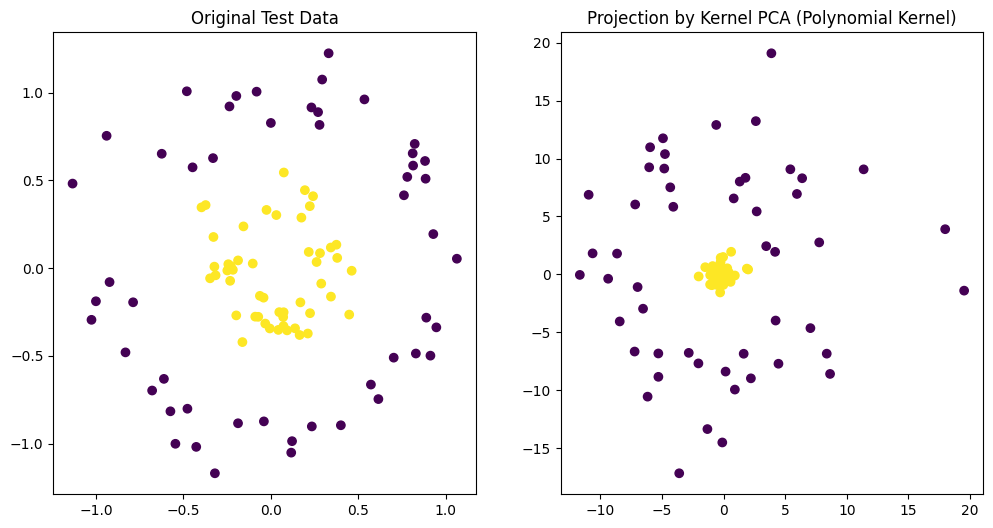

Mean squared error for Kernel PCA with Polynomial Kernel is: 0.015529093186379494


In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply Kernel PCA with Polynomial kernel
kernel_pca = KernelPCA(kernel="poly", gamma=5, n_components=2, fit_inverse_transform=True)
kernel_pca.fit(X_train)

# Transform the test data
X_kpca = kernel_pca.transform(X_test)

# Inversely transform the projected data
X_inv = kernel_pca.inverse_transform(X_kpca)

# Compute the reconstruction error
reconstruction_error = ((X_test - X_inv) ** 2).mean()

# Plot original test data and their projection
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.title("Original Test Data")

plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_test, cmap='viridis')
plt.title("Projection by Kernel PCA (Polynomial Kernel)")

plt.show()

# Output the reconstruction error
print("Mean squared error for Kernel PCA with Polynomial Kernel is:", reconstruction_error)


## Kernel PCA: Uncover the Hidden Patterns
Now it's your time to shine, young coder! Complete the code by adding a line that initiates the KernelPCA. The destiny of the data lies in your hands!

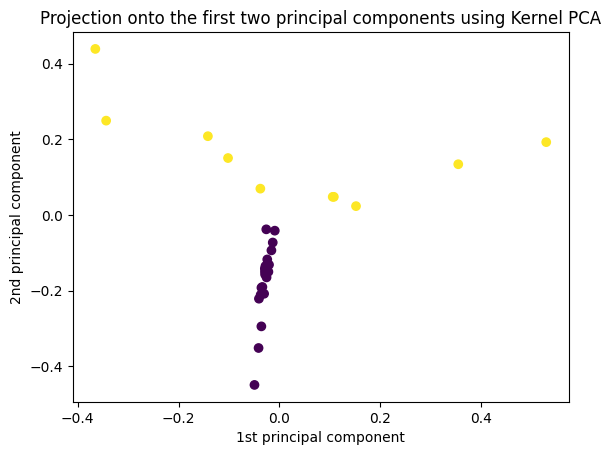

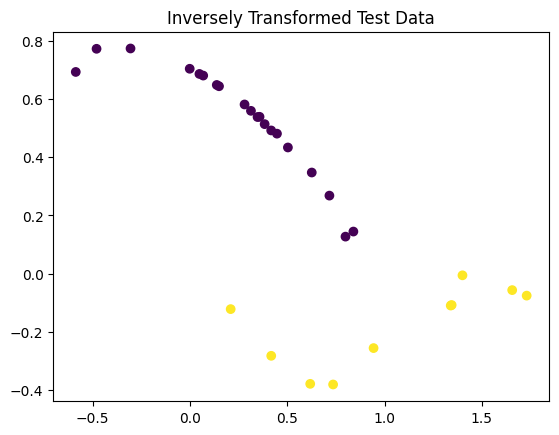

Mean squared error for Kernel PCA is: 0.269353646862336


In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Create a non-linearly separable dataset
X, y = make_moons(n_samples=100, noise=0.05, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit KernelPCA on the training data to reduce the data to 2 components
# Use 'rbf' for kernel, set gamma to 15, and set fit_inverse_transform parameter to True
kernel_pca = KernelPCA(kernel="rbf", gamma=15, n_components=2, fit_inverse_transform=True)
kernel_pca.fit(X_train)

# Transform the test data and plot the projection
X_test_transformed = kernel_pca.transform(X_test)
plt.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=y_test, cmap='viridis')
plt.title("Projection onto the first two principal components using Kernel PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

# Inversely transform the data back to original space
X_test_inverse_transformed = kernel_pca.inverse_transform(X_test_transformed)
plt.scatter(X_test_inverse_transformed[:, 0], X_test_inverse_transformed[:, 1], c=y_test, cmap='viridis')
plt.title("Inversely Transformed Test Data")
plt.show()

# Calculate the reconstruction mean squared error
reconstruction_error = ((X_test - X_test_inverse_transformed) ** 2).mean()
print(f"Mean squared error for Kernel PCA is: {reconstruction_error}")
